In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
def loc_clean(fl):
    df = pd.read_csv(fl)
    df = df[['neighbourhood_cleansed', 'neighbourhood_group_cleansed','zipcode', 
               'latitude', 'longitude', 'property_type', 'room_type','beds', 'price']].dropna()
    df = df[df['beds']==1].drop(columns='beds')
    df = df[df['property_type'].isin(['Apartment','House'])]
    df = df[df['room_type']!='Shared room']
    df['price'] = df['price'].apply(lambda x: x.replace('$','').replace(',','')).astype('float')
    return df

In [44]:
df


,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,latitude,longitude,property_type,room_type,price
1,Roosevelt,Other neighborhoods,98115,47.687801,-122.313427,House,Private room,82.0
3,Wallingford,Other neighborhoods,98103,47.654109,-122.337605,Apartment,Entire home/apt,90.0
10,High Point,Delridge,98106,47.553646,-122.363257,House,Private room,40.0
11,Maple Leaf,Northgate,98115,47.695719,-122.311944,House,Private room,60.0
14,Maple Leaf,Northgate,98115,47.695737,-122.313163,House,Private room,60.0
15,Green Lake,Other neighborhoods,98103,47.687246,-122.334696,House,Private room,40.0
16,Green Lake,Other neighborhoods,98103,47.688266,-122.335856,House,Private room,60.0
17,Green Lake,Other neighborhoods,98115,47.684072,-122.326488,House,Private room,91.0
18,High Point,Delridge,98106,47.551618,-122.364431,House,Private room,40.0
25,Adams,Ballard,98107,47.673607,-122.393803,House,Entire home/apt,79.0


In [38]:
def myplot(df_,title='seattle'):
    df = df_.copy()
    maxprice = df.price.max()
    #df['myc'] = df.apply(lambda x:pow(x['price']/maxprice,1/3), axis=1)
    myc = df.apply(lambda x:[1-pow(x['price']/maxprice,1/3)]*3, axis=1)
    mysize = df.apply(lambda x: pow(x['price']/maxprice,2)*1000, axis=1)
    sns.set()
    #sns.set_context("poster")
    ax=df.plot.scatter(x='longitude',y='latitude',c=myc,s=mysize,alpha=0.8,figsize=(6,10))
    ax.set_title(title)

In [24]:
file = '../data/2018_04_14/listings.csv'
df = loc_clean(file)


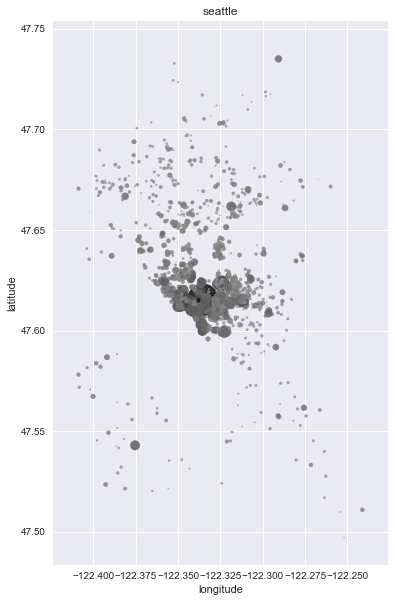

In [35]:
tot = df[df['property_type']=='Apartment'].drop(columns=['neighbourhood_cleansed','neighbourhood_group_cleansed','zipcode','property_type','room_type'])\
            .reset_index(drop='True')
a = myplot(tot)

In [39]:
def plotnb(nb,df):
    nbdf = df[df['neighbourhood_cleansed']==nb][['latitude','longitude','price']]
    myplot(nbdf,nb)

/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


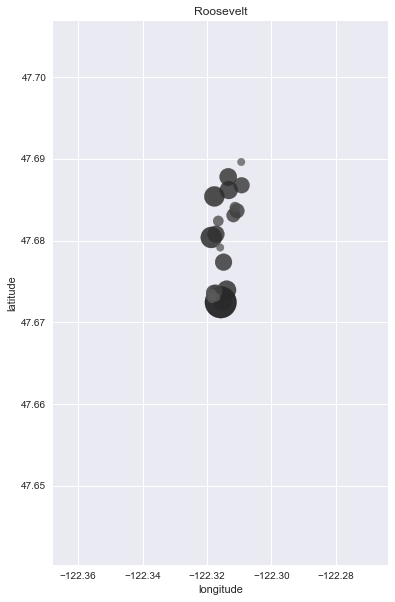

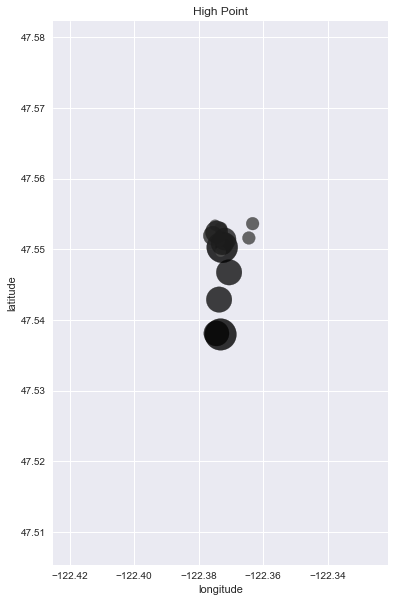

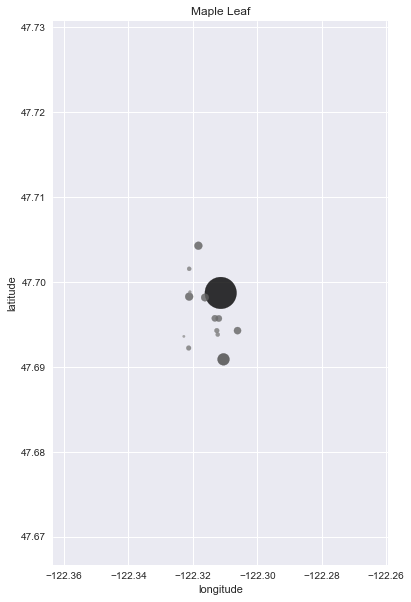

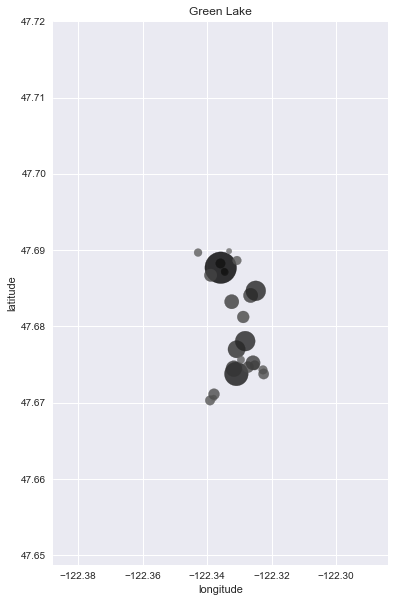

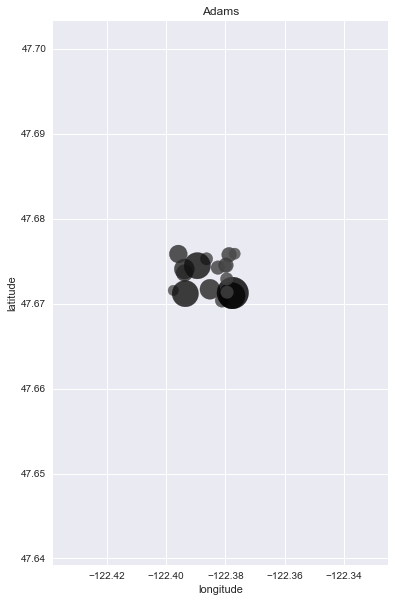

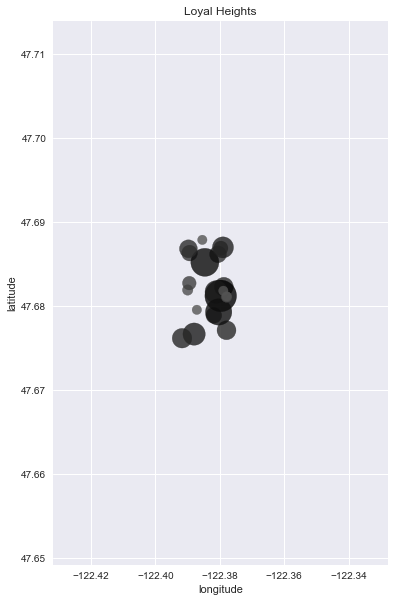

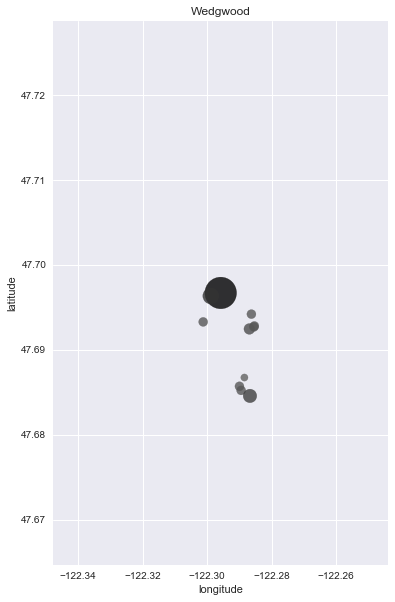

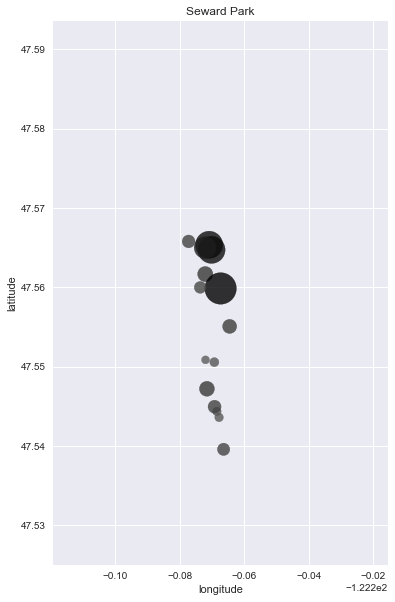

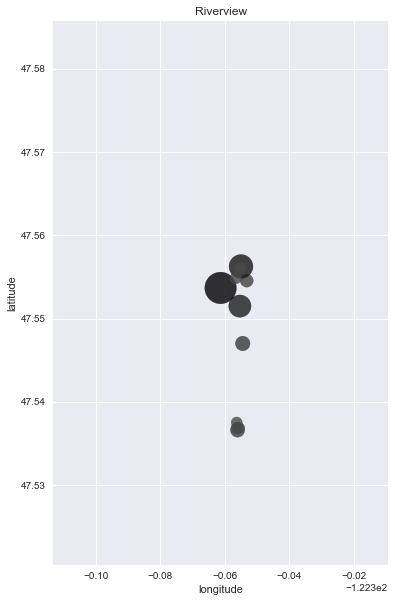

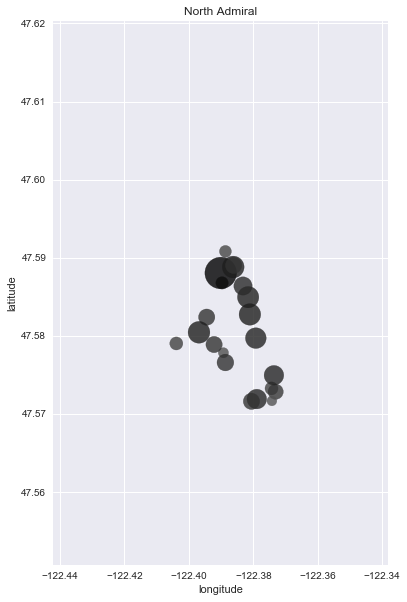

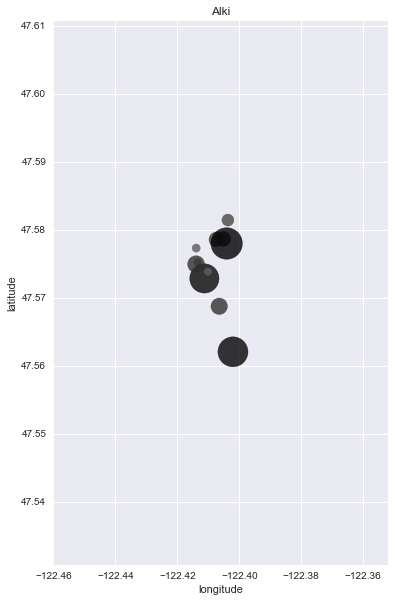

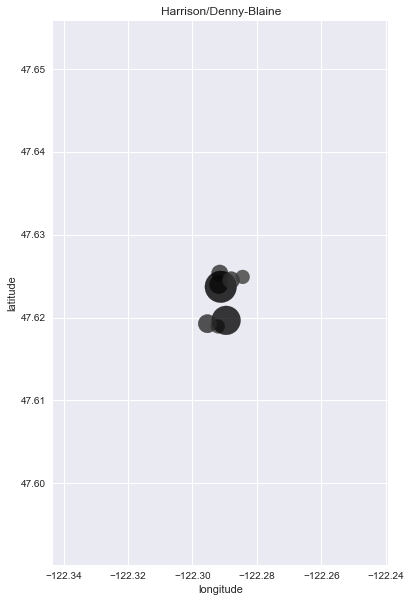

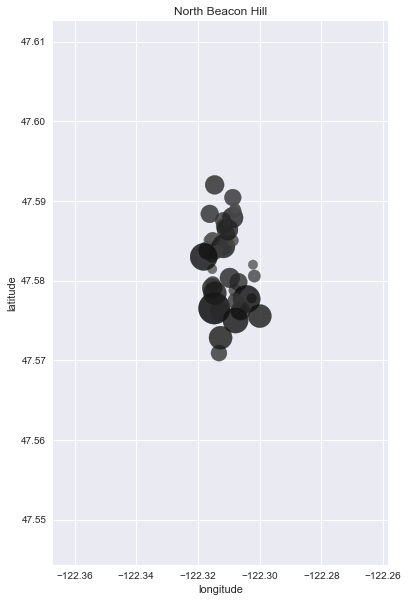

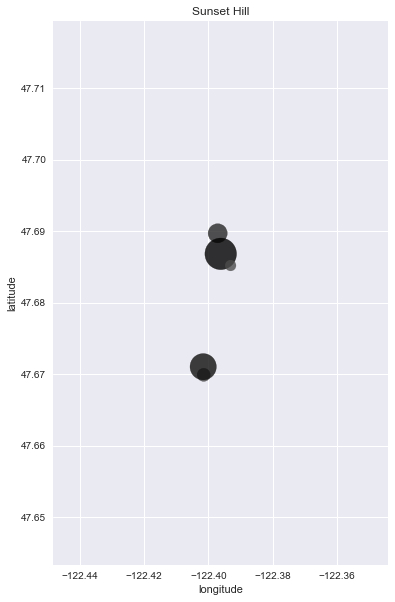

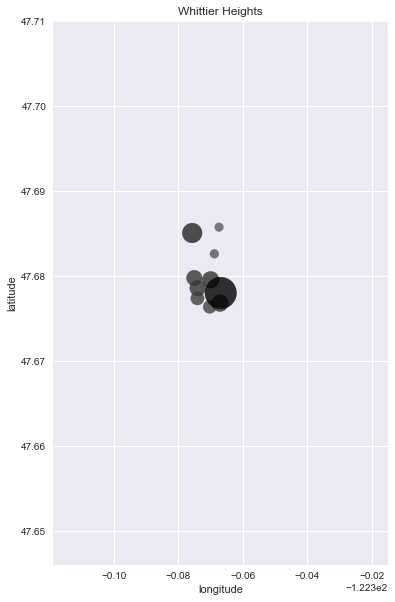

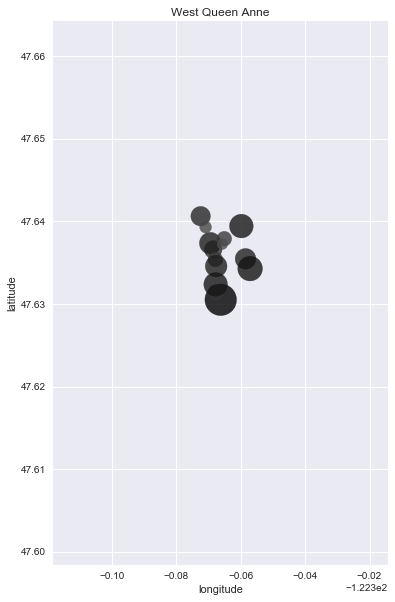

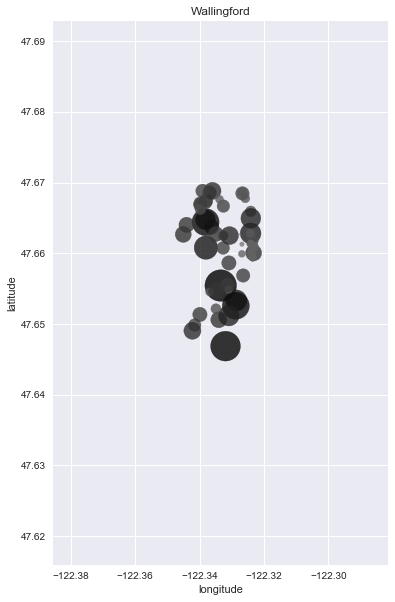

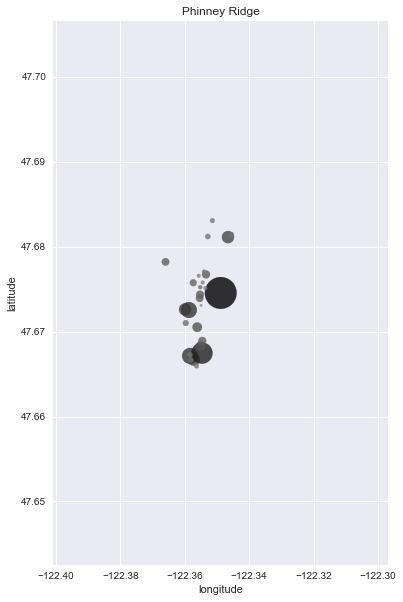

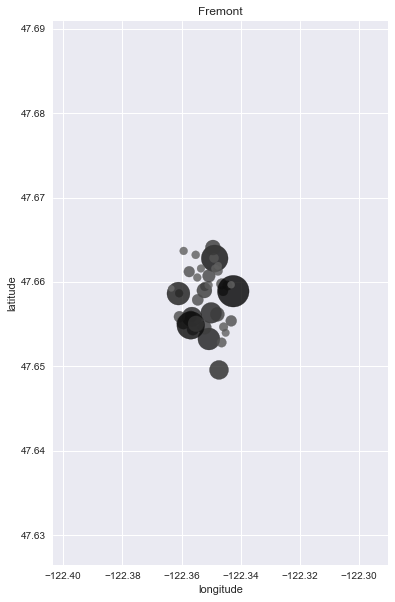

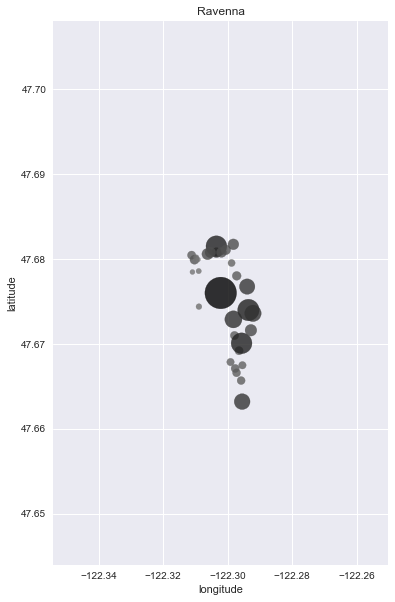

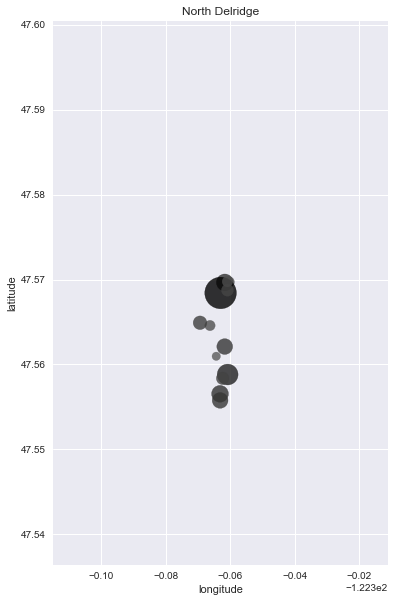

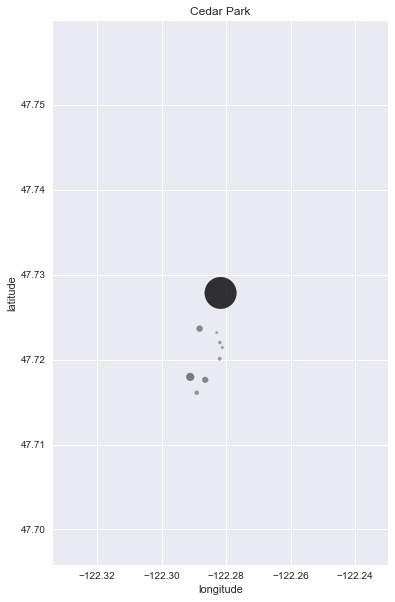

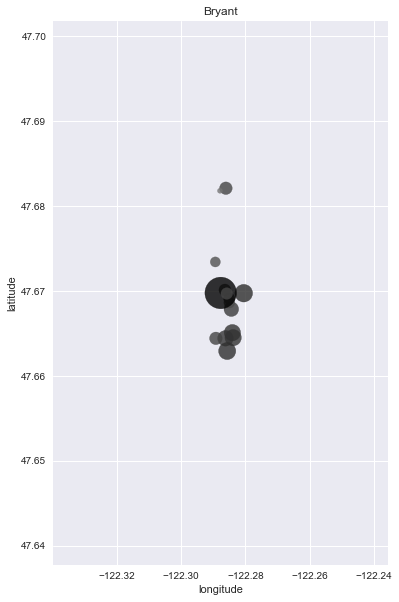

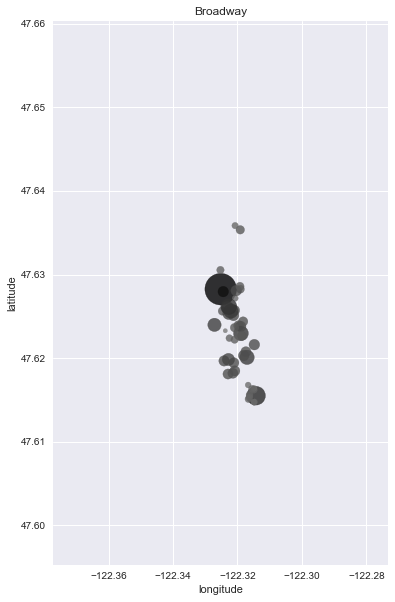

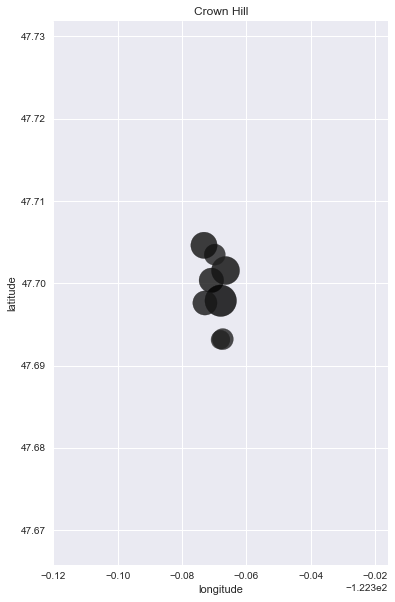

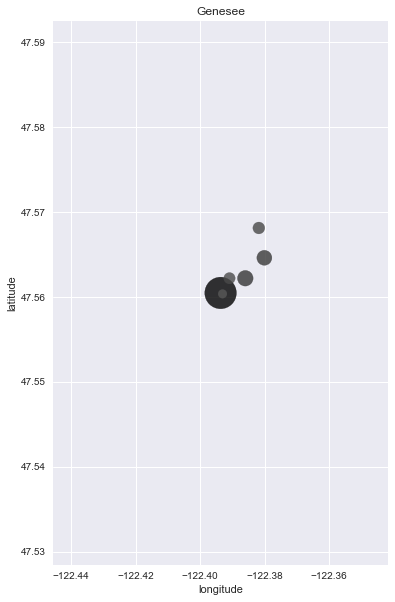

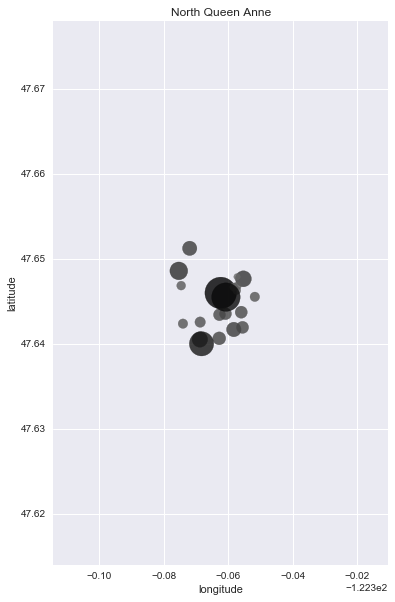

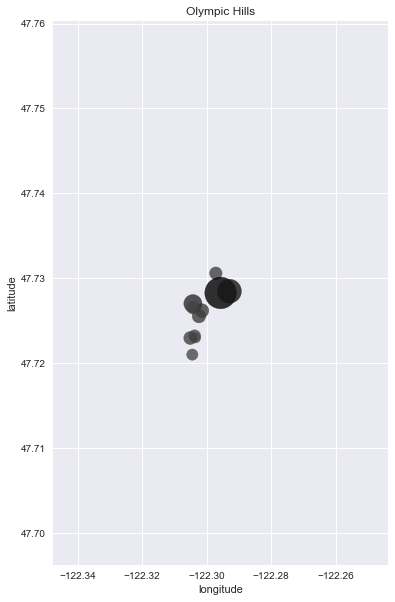

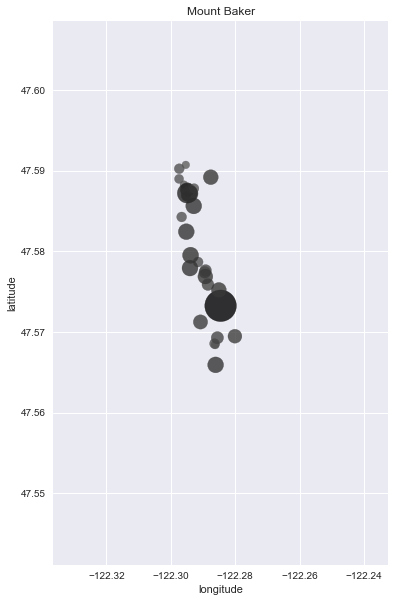

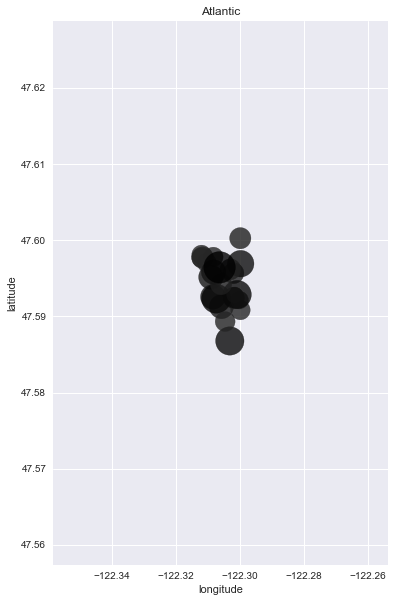

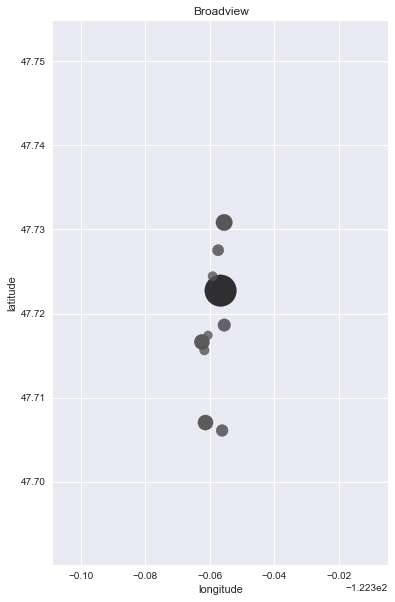

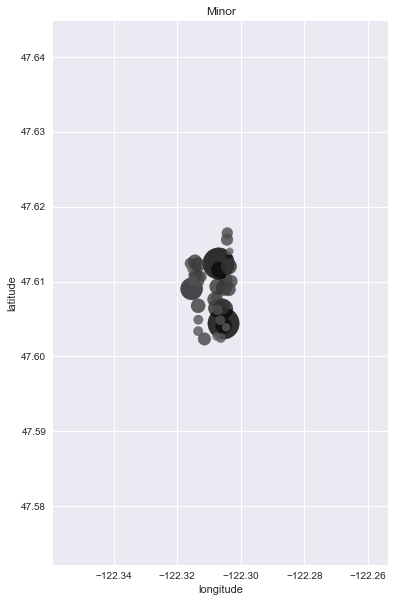

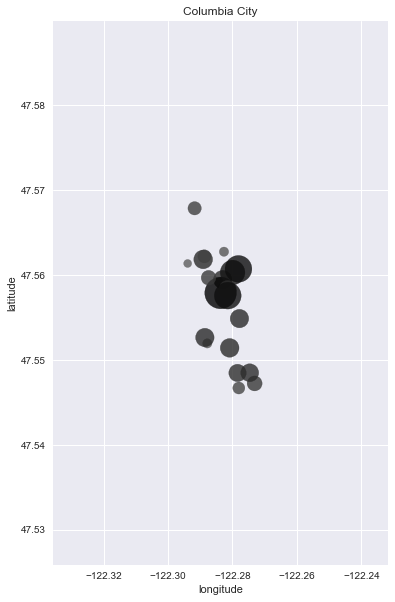

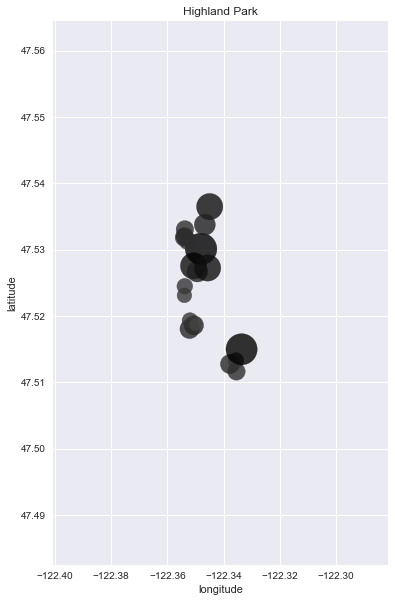

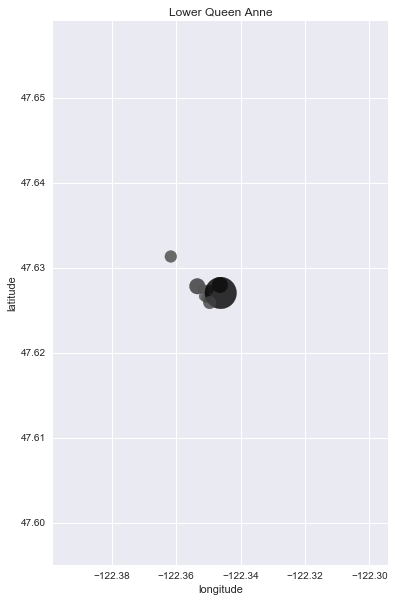

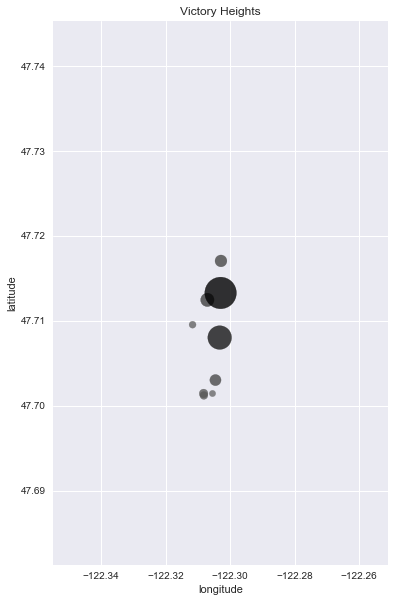

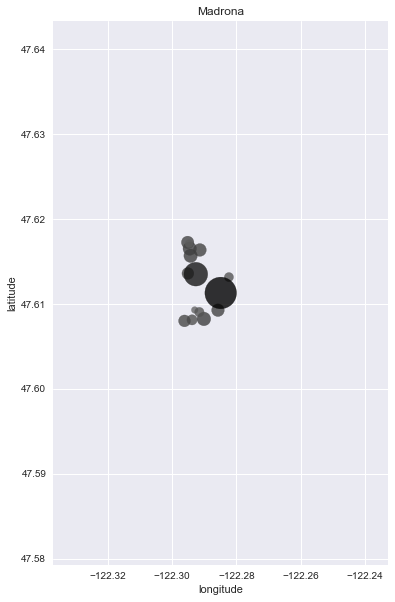

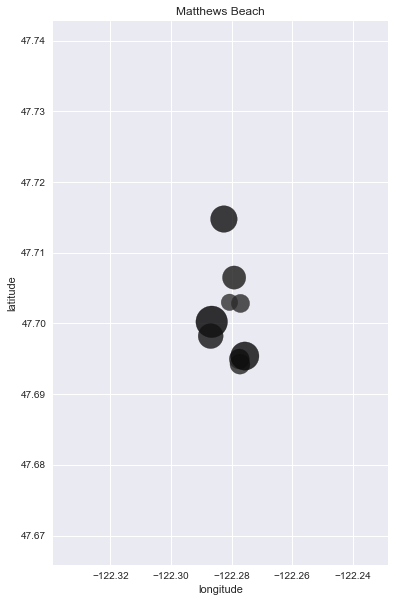

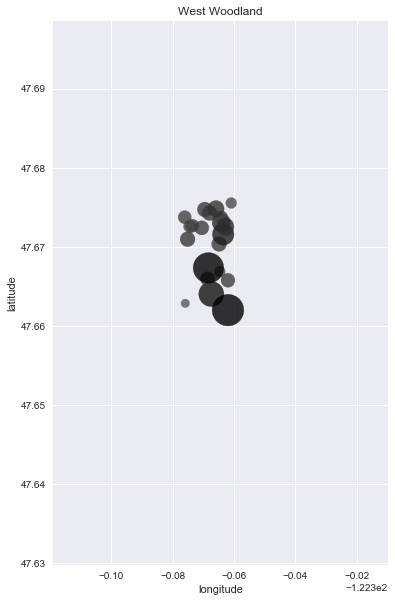

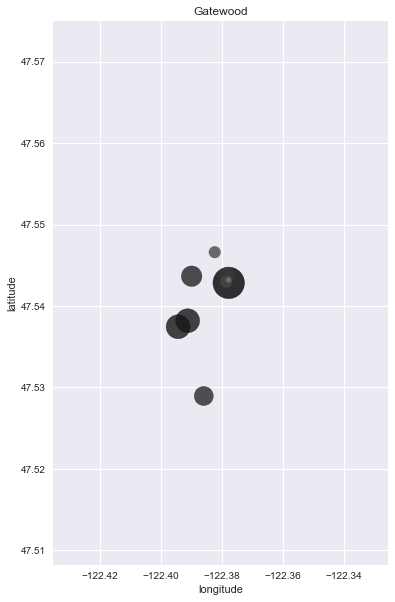

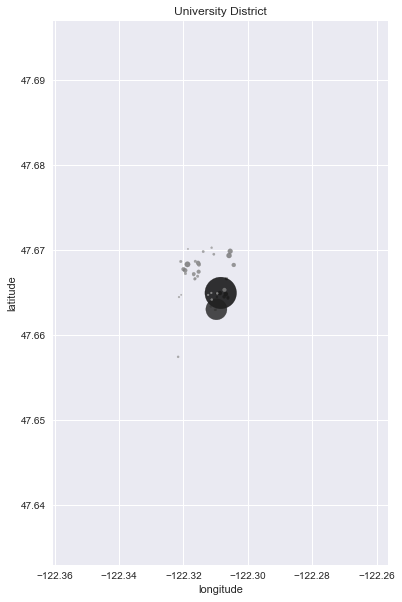

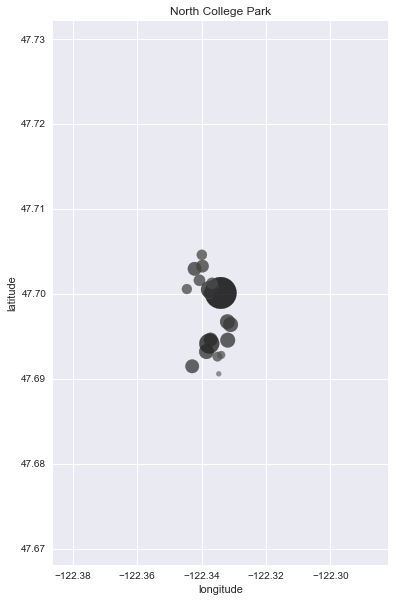

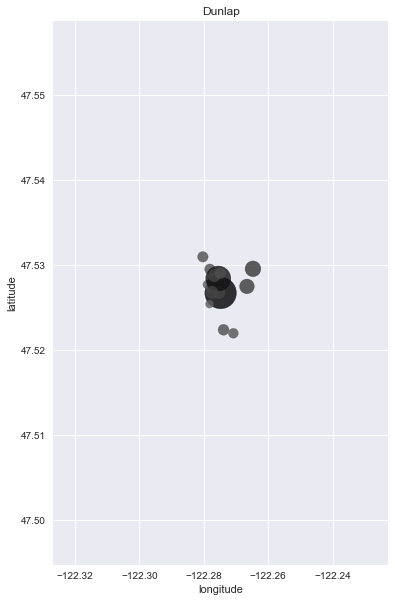

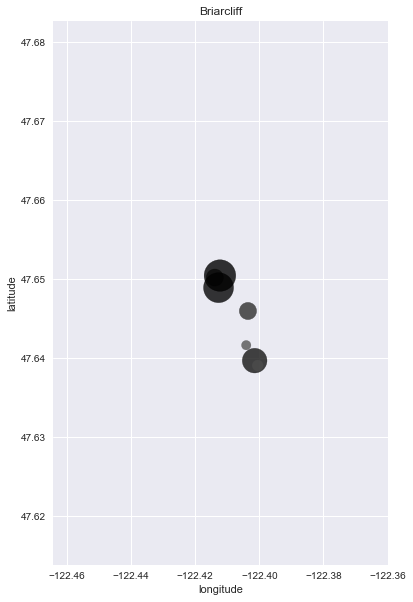

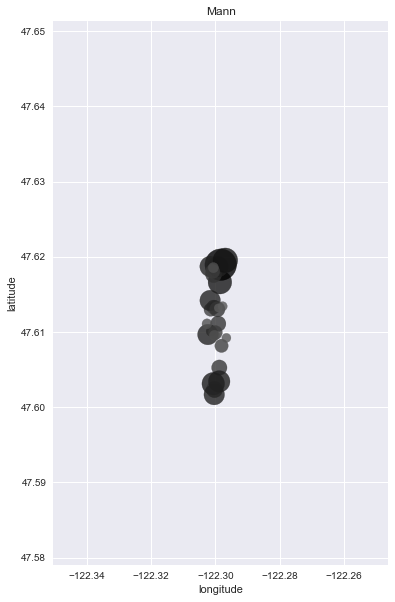

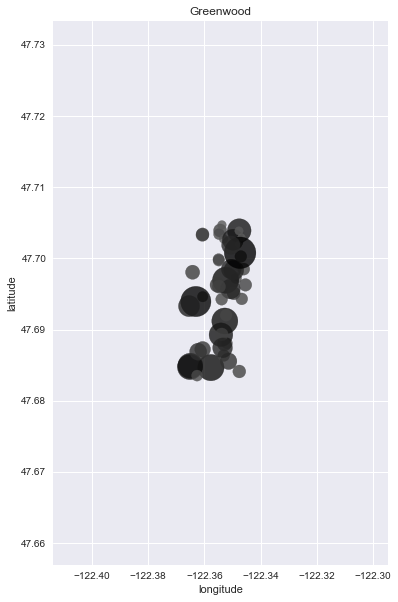

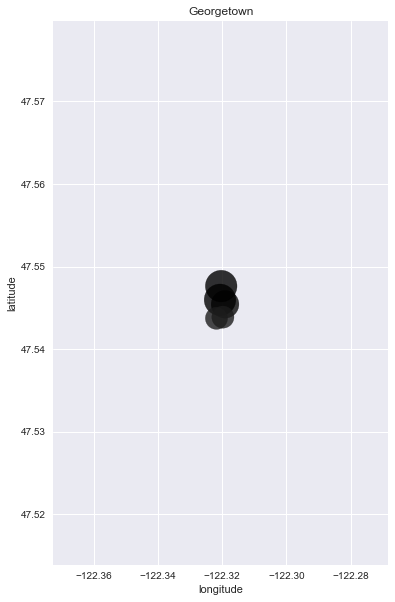

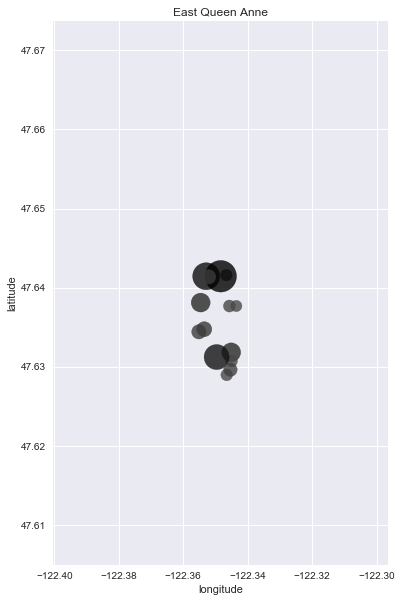

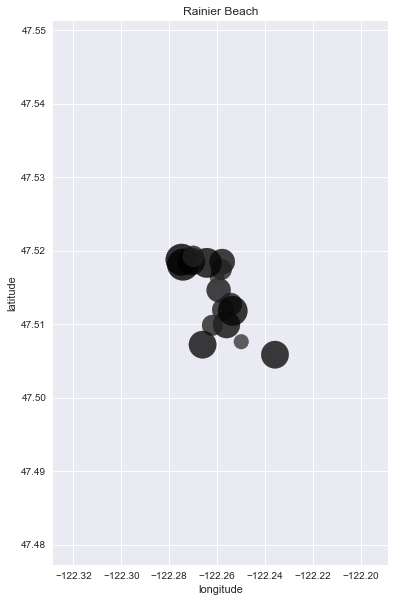

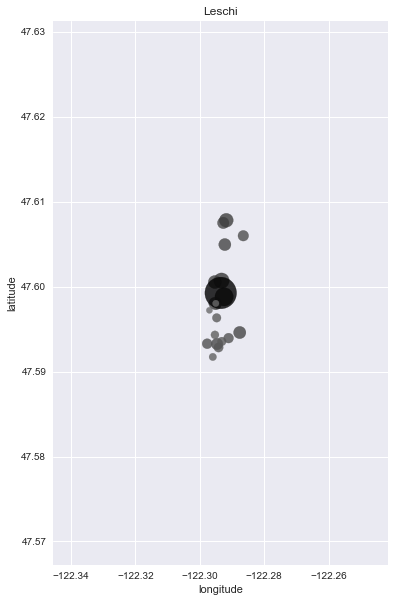

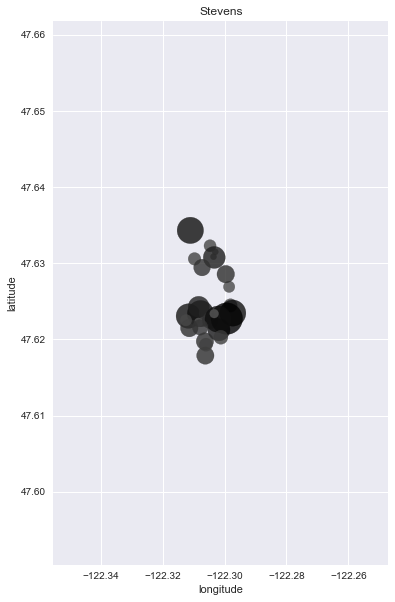

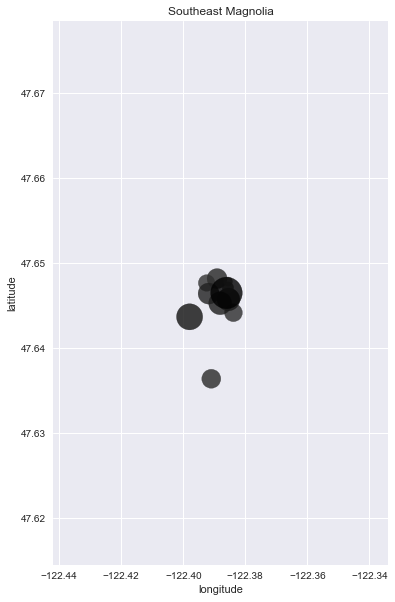

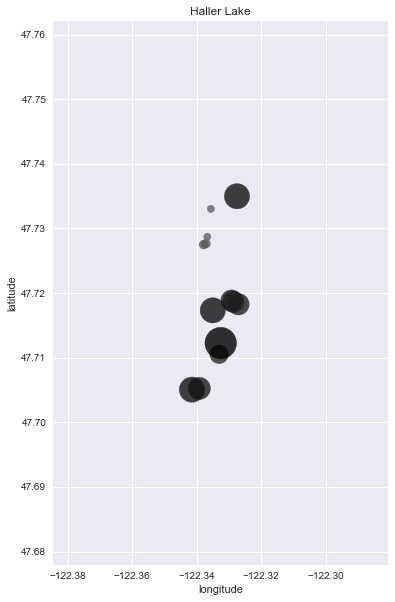

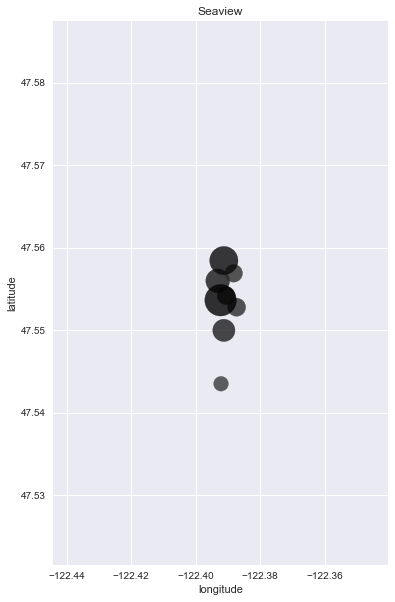

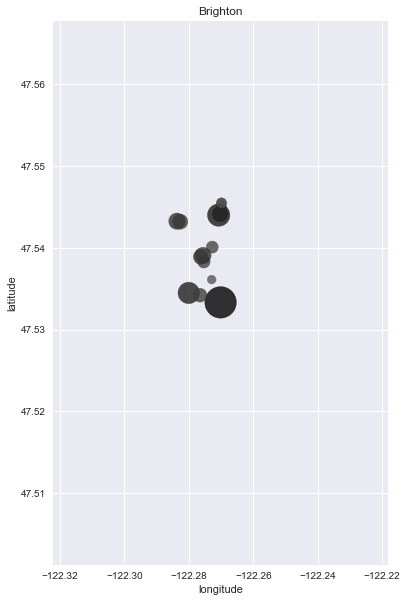

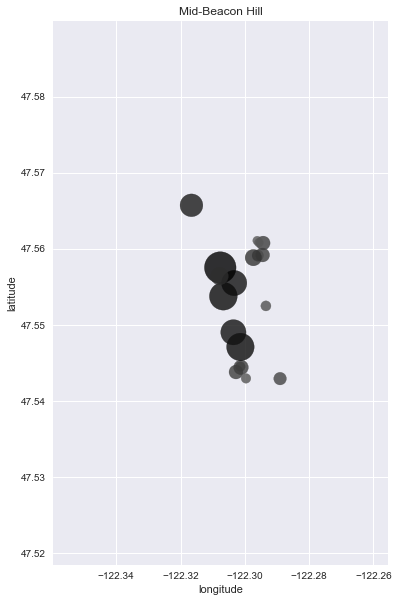

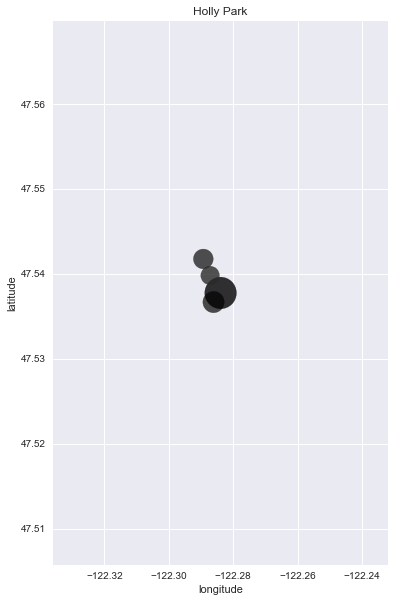

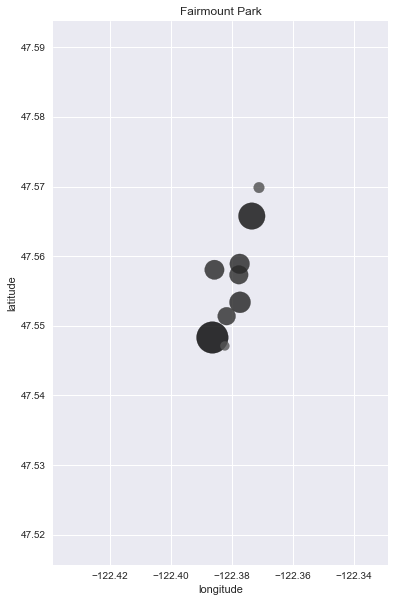

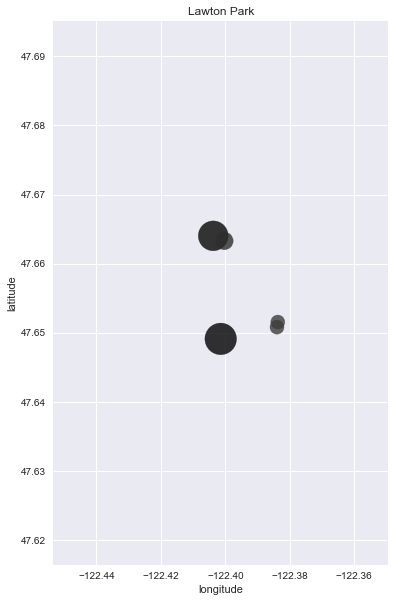

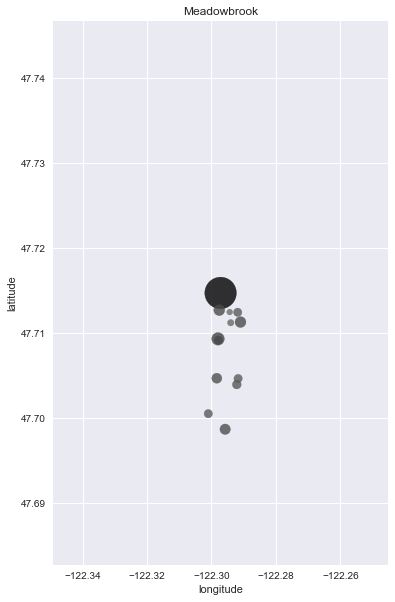

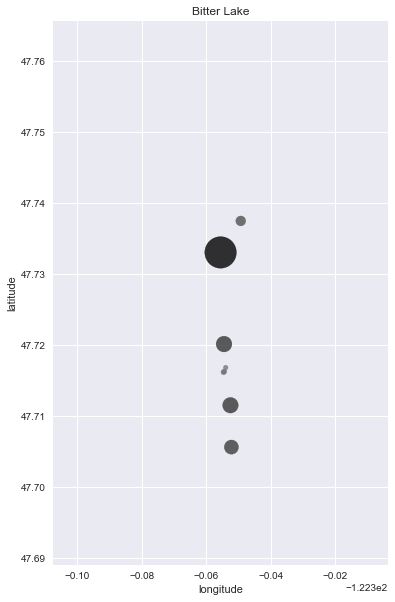

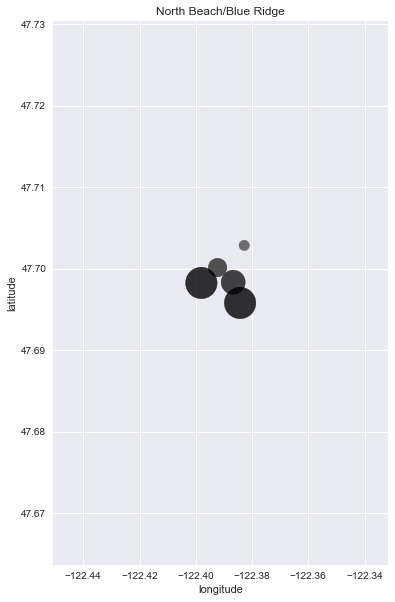

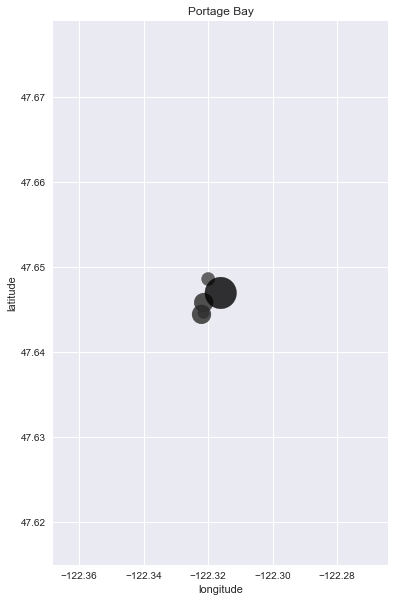

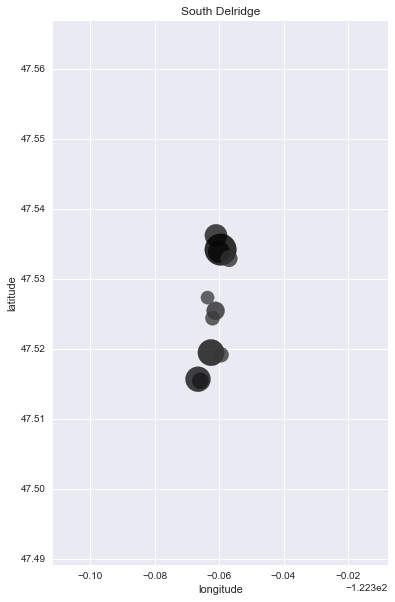

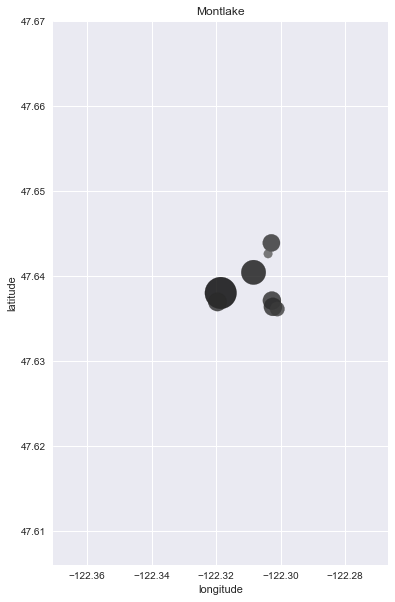

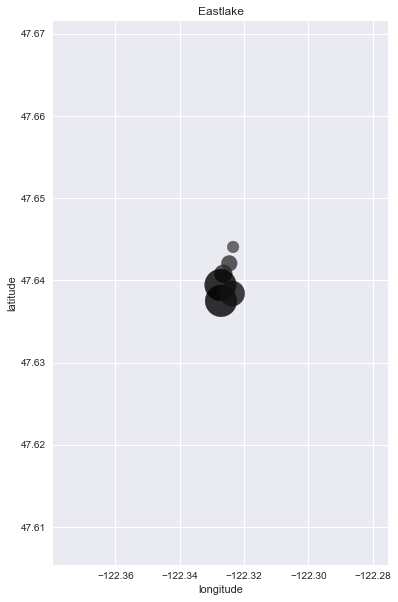

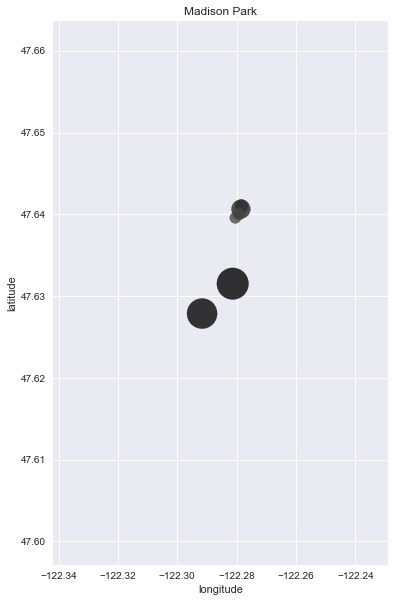

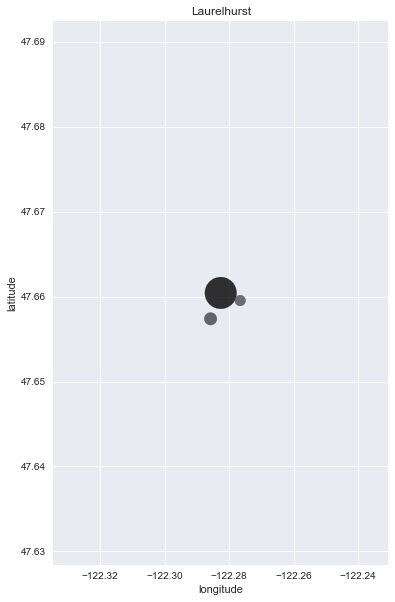

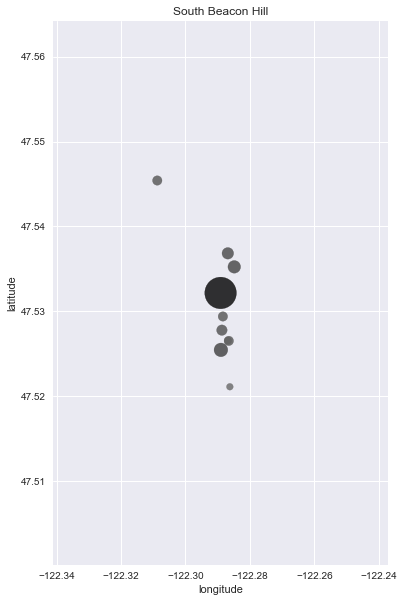

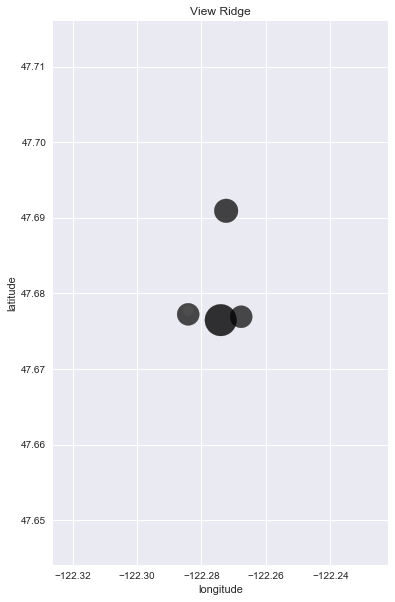

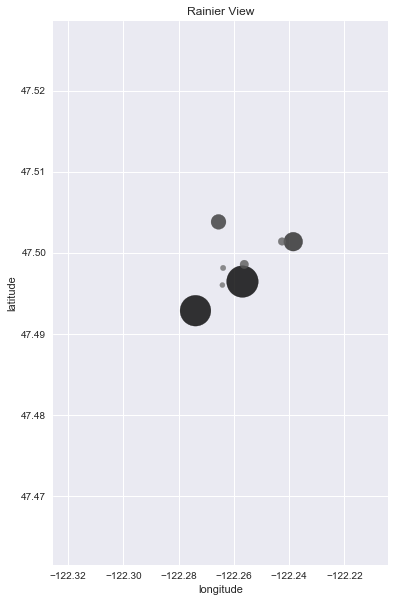

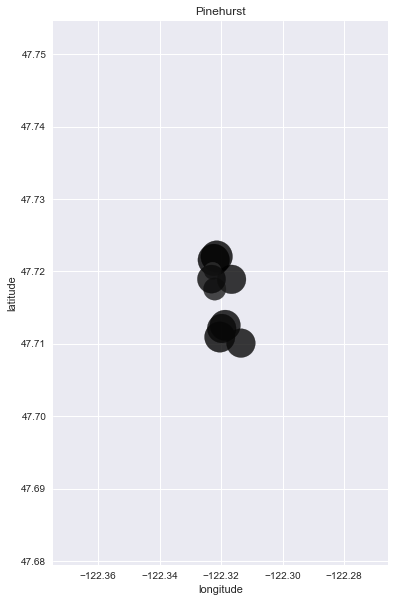

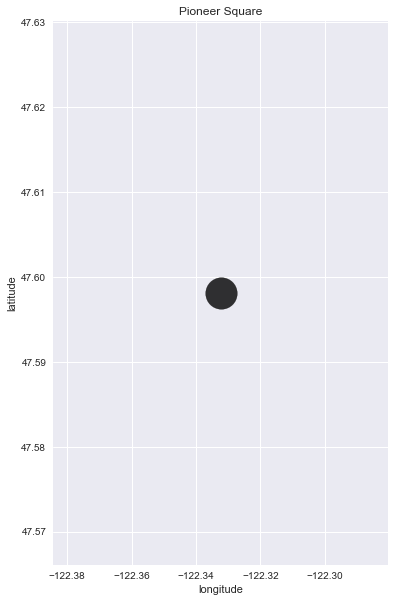

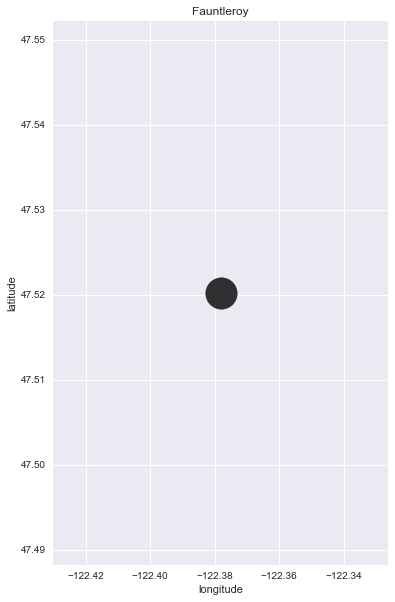

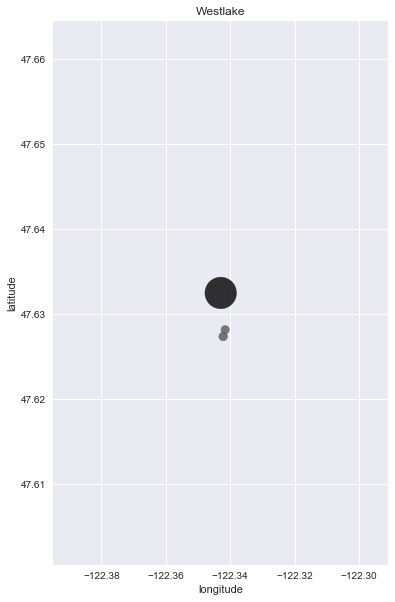

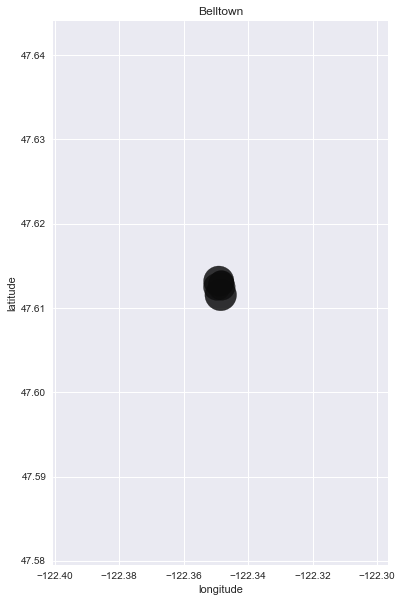

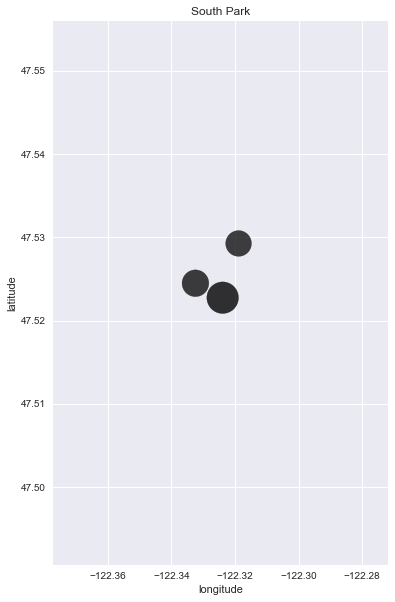

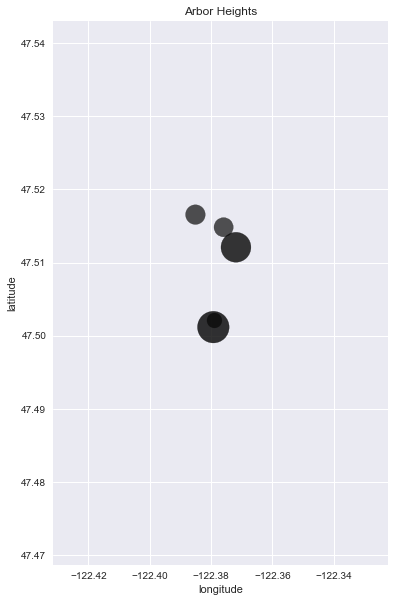

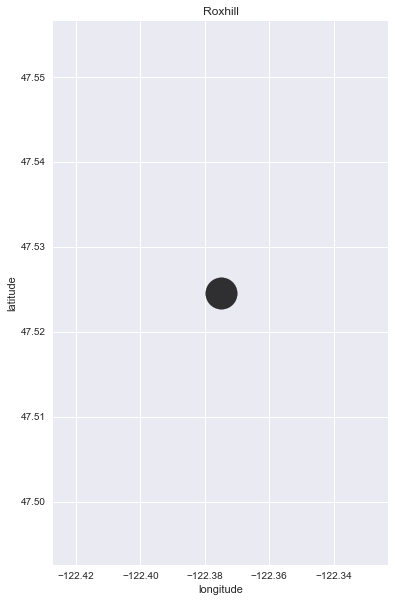

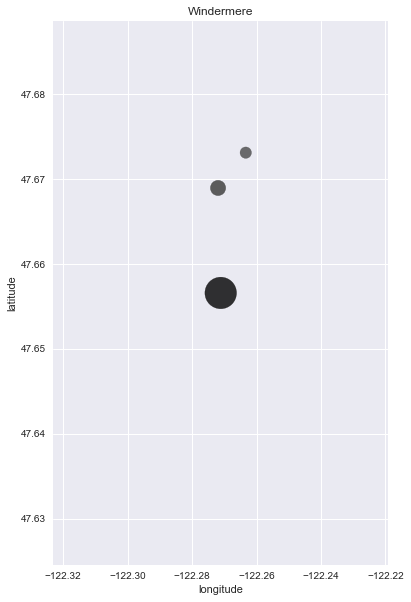

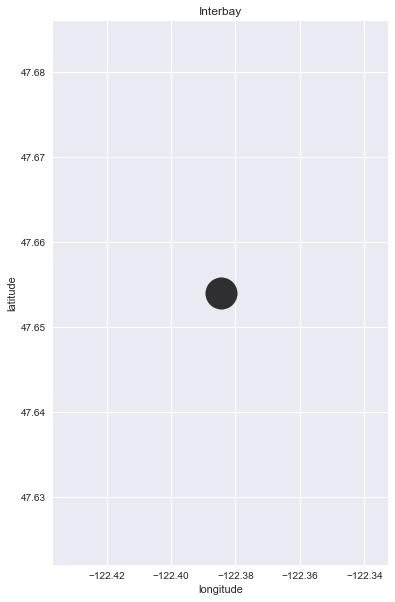

In [43]:
nbgroup = df[df['property_type']=='House']['neighbourhood_cleansed'].unique()
for x in nbgroup:
    plotnb(x,df[df['property_type']=='House'])

In [14]:
tot = df.drop(columns=['neighbourhood_cleansed','neighbourhood_group_cleansed','zipcode','property_type','room_type'])\
            .reset_index(drop='True')
a = myplot(tot)